In [1]:
#Task 1
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import os
import sklearn


##import inforamtion from Kaggle 
CCLoan = pd.read_csv(r'D:\springboard\DataScienceGuidedCapstone\Unit7\DataCapstoneProject2\ccFraudDefault\application_data.csv',header=0)

In [2]:
#Task 2.0
#preview first 25 row to verify data was imported correctly

CCLoan.head(25)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Task 2.0.1
#rename certian column to be more readable
CCLoan.rename(columns={'SK_ID_CURR':'CLIENTID','TARGET':'LATE_PAYMENT'},inplace = True)

In [4]:
#Task 2.1
#Total row of record is 307511 and 122 column
CCLoan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, CLIENTID to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
# Task 2.2
# These are the columns i know i want to keep so i will fill out the na
CCLoan.fillna({'OWN_CAR_AGE':0,'AMT_GOODS_PRICE':CCLoan.AMT_GOODS_PRICE.mean(),'AMT_ANNUITY': 0,'CNT_FAM_MEMBERS':0.0,
               'WALLSMATERIAL_MODE':'unknown','HOUSETYPE_MODE':'unknown','AMT_REQ_CREDIT_BUREAU_QRT':0.0,
               'AMT_REQ_CREDIT_BUREAU_YEAR':0.0,'NAME_TYPE_SUITE':'N/A','OCCUPATION_TYPE':'N/A',
               'DEF_60_CNT_SOCIAL_CIRCLE':'N/A','OBS_60_CNT_SOCIAL_CIRCLE':'N/A','DEF_30_CNT_SOCIAL_CIRCLE':'N/A',
               'OBS_30_CNT_SOCIAL_CIRCLE':'N/A'    
              },inplace = True)

In [6]:
#Task 2.2.1
bbb=CCLoan.isna().sum()
bbb.sort_values(ascending = False).head(10)

COMMONAREA_MEDI             214865
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64

In [7]:
#Task2.3
#get a list of columns that is NaN

bbb=CCLoan.isna().sum()
bbb.sort_values(ascending = False)

# Get a list of columns that will drop if more than 40% that is null
# View the columns.
threshold = len(CCLoan)*.4
columns_drop = bbb.loc[bbb > threshold].index
columns_drop

Index(['EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MOD

In [8]:
#Task 2.4
#drop columns
#CCLoan.drop(CCLoan.loc[[columns_drop]],axis=1,inplace=True)

CCLoan.drop(CCLoan[columns_drop].columns,axis=1,inplace=True)


In [9]:
#Task 2.5
#see how many rows left after dropping columns with more than.  I see 76 columns left
#CCLoan.info()
CCLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [10]:
#Task 2.5.1
# i see there are some more columns i want to drop as the data is not useful
bbb=CCLoan.isna().sum()
bbb.sort_values(ascending = False).head(10)

EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
EXT_SOURCE_2                    660
DAYS_LAST_PHONE_CHANGE            1
CLIENTID                          0
DEF_60_CNT_SOCIAL_CIRCLE          0
FLAG_DOCUMENT_5                   0
dtype: int64

In [11]:
#Task 2.6
# drop the column EXT_SOURCE_3, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK,
# AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR, EXT_SOURCE_2

CCLoan=CCLoan.drop(['EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
                    'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','EXT_SOURCE_2'],axis=1)


In [12]:
#task 2.6.1
#see the data after dropping the column above.  It now has 70 column

CCLoan.head(25)

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0,0,0,0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,1,0,0,0,0,0,0,0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0,0,0,0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0,0,0,0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,0,0,0,0,0.0,0.0


In [13]:
#Task 2.7
# review data to see if data should be kept and clarify what is that data

aaa=CCLoan.isna().sum()
aaa.sort_values(ascending = False,)


DAYS_LAST_PHONE_CHANGE         1
CLIENTID                       0
DEF_30_CNT_SOCIAL_CIRCLE       0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_3                0
                              ..
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
Length: 70, dtype: int64

In [14]:
#Task 2.7.1
AAAA=CCLoan[CCLoan['DAYS_LAST_PHONE_CHANGE'].isnull()]
AAAA[['CLIENTID','LATE_PAYMENT','FLAG_OWN_CAR','OWN_CAR_AGE','HOUSETYPE_MODE','DAYS_LAST_PHONE_CHANGE']].head(10)

,CLIENTID,LATE_PAYMENT,FLAG_OWN_CAR,OWN_CAR_AGE,HOUSETYPE_MODE,DAYS_LAST_PHONE_CHANGE
15709,118330,0,Y,21.0,block of flats,NaN


In [15]:
#Task 2.7.2
# fill the single column with
CCLoan.fillna({'DAYS_LAST_PHONE_CHANGE':0},inplace = True)

In [16]:
#Task 2.7.3
# fill the single column with
aaa=CCLoan.isna().sum()
aaa.sort_values(ascending = False,)

CLIENTID                       0
DEF_30_CNT_SOCIAL_CIRCLE       0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_2                0
                              ..
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
AMT_REQ_CREDIT_BUREAU_YEAR     0
Length: 70, dtype: int64

In [17]:
#Task 2.8
#Looked at the features left and notice there are some columns that are useless.  
#They will be dropped

CCLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:
#Task 2.9
# Drop column with feature that are not needed
CCLoan = CCLoan.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'],axis =1)



In [19]:
#Task 2.9.1
CCLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [20]:
#Task 3.2.0
#to decifer who own car you will need to use FLAG_OWN_CAR to see if they have car.  I am settinb


In [ ]:
### 

#threshold = len(CCLoan)*.4
#columns_drop = bbb.loc[bbb > threshold].index
#columns_drop

In [21]:
#Task 6.1
# find if a person with late payment will have more cars or less
CCLoan['FLAG_OWN_CAR'].count()

307511

In [22]:
#Task 6.1.1
LatePay= CCLoan.loc[CCLoan['LATE_PAYMENT']==1]
NoLate = CCLoan.loc[CCLoan['LATE_PAYMENT']==0]


In [23]:
#Task 6.1.2

#percent of people who are late vs nonlate on cc payment
print ('% of Late Payment : ' +str(len(LatePay['CLIENTID'])/len(CCLoan['CLIENTID'])*100))
print ('% in good standing : ' +str(len(NoLate['CLIENTID'])/len(CCLoan['CLIENTID'])*100))


#there is a 8% default on credit


% of Late Payment : 8.072881945686495
% in good standing : 91.92711805431351


In [24]:
#Task 6.1.5
NoLate


,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,block of flats,Block,1.0,0.0,1.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,unknown,unknown,0.0,0.0,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,unknown,unknown,2.0,0.0,2.0,0.0,-617.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,unknown,unknown,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Other,unknown,unknown,0.0,0.0,0.0,0.0,-2536.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,XNA,block of flats,Panel,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Services,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,-273.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,XNA,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,School,block of flats,Panel,6.0,0.0,6.0,0.0,-1909.0,0.0,1.0


In [25]:
#Task 6.1.6
#Find what is percentage who is Late Payment that owns a car

owncar_LatePayment=(len(LatePay[LatePay['FLAG_OWN_CAR']=='Y']))/len(LatePay['FLAG_OWN_CAR'])*100
print ('% whom has defaulted: '+ str(owncar_LatePayment))


owncar_NoLate=(len(NoLate[NoLate['FLAG_OWN_CAR']=='Y']))/len(NoLate['FLAG_OWN_CAR'])*100
print('% that has not defaulted : '+ str(owncar_NoLate))


#there is a 4% difference where person who owns car that didnt default as to to whom has


% whom has defaulted: 30.517623363544814
% that has not defaulted : 34.317582052170955


In [ ]:
#Task 6.1.8
#Find what is percentage who is Late Payment that owns reality




In [47]:
CCLoan.NAME_CONTRACT_TYPE.unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

In [48]:
#Task 7.0
#In next EDA notebook i want to do heatmap but notice I cant
#Converting CODE_GENDER from 0 female and 1 for male
#Converting  FLAG_OWN_CAR from 0 False and 1 True
#Converting  NAME_CONTRACT_TYPE from 0 Cash loans and 1 Revolving loans
CCLoan.replace({'CODE_GENDER':{'F':0,'M':1}},inplace= True)
CCLoan.replace({'FLAG_OWN_CAR':{'N':0,'Y':1}},inplace= True)
CCLoan.replace({'FLAG_OWN_REALTY':{'N':0,'Y':1}},inplace= True)
CCLoan.replace({'NAME_CONTRACT_TYPE':{'Cash loans':0,'Revolving loans':1}},inplace= True)
#CCLoan['LATE_PAYMENT','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'].head()

In [27]:
#Task 7.0.1
#Check if data looks correct now
CCLoan[['CLIENTID','LATE_PAYMENT','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']].head(10)

,CLIENTID,LATE_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,100002,1,1,0,1
1,100003,0,0,0,0
2,100004,0,1,1,1
3,100006,0,0,0,1
4,100007,0,1,0,1
5,100008,0,1,0,1
6,100009,0,0,1,1
7,100010,0,1,1,1
8,100011,0,0,0,1
9,100012,0,1,0,1


In [28]:
#Task 7.0.2
#Check if i can change the dtype of the values i changed above
#values changed above dtype has automatically change so I can use heat map
CCLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [29]:
CCLoan[['CLIENTID','CNT_FAM_MEMBERS','LATE_PAYMENT','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']].head(10)              



,CLIENTID,CNT_FAM_MEMBERS,LATE_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,100002,1.0,1,1,0,1
1,100003,2.0,0,0,0,0
2,100004,1.0,0,1,1,1
3,100006,2.0,0,0,0,1
4,100007,1.0,0,1,0,1
5,100008,2.0,0,1,0,1
6,100009,3.0,0,0,1,1
7,100010,2.0,0,1,1,1
8,100011,2.0,0,0,0,1
9,100012,1.0,0,1,0,1


In [30]:
CCLoan['CODE_GENDER'].unique()

array([1, 0, 'XNA'], dtype=object)

In [31]:
CCLoan.groupby(['CODE_GENDER']).count() 

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CODE_GENDER,,,,,,,,,,,,,,,,,,,,,
0,202448,202448,202448,202448,202448,202448,202448,202448,202448,202448,...,202448,202448,202448,202448,202448,202448,202448,202448,202448,202448
1,105059,105059,105059,105059,105059,105059,105059,105059,105059,105059,...,105059,105059,105059,105059,105059,105059,105059,105059,105059,105059
XNA,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [32]:
CCLoan.loc[CCLoan['CODE_GENDER']=='XNA'].head()

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,1,1,0,207000.0,382500.0,19125.0,...,Business Entity Type 1,unknown,unknown,0.0,0.0,0.0,0.0,-286.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,0,1,2,157500.0,270000.0,13500.0,...,Industry: type 3,block of flats,"Stone, brick",0.0,0.0,0.0,0.0,-493.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,0,1,1,135000.0,405000.0,20250.0,...,Kindergarten,block of flats,Panel,7.0,1.0,7.0,1.0,-851.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,1,1,0,247500.0,540000.0,27000.0,...,Medicine,block of flats,"Stone, brick",10.0,4.0,10.0,4.0,-1681.0,1.0,6.0


ValueError: No axis named 1 for object type Series

In [44]:
#Task
#going to replace the  the 4 rows that has 'CODE_GENDER' = XNA, replacing them to 0 
#the difference of percentage of male to female ratio only changes by 1 - ten thousands of percentage by adding them as female
#the current ratio of male to female borrower is 1:2.  
CCLoan.replace({'CODE_GENDER':{'XNA':0}},inplace=True)

In [45]:
CCLoan['CODE_GENDER'].unique()


array([1, 0], dtype=int64)

In [49]:
CCLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int64  
 3   CODE_GENDER                  307511 non-null  int64  
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [60]:
#Task 9
#recreating DF to drop columns that are objects
CCLoan_graph=CCLoan.drop(['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1)

In [59]:
#used this cell to test the different type of columns in previous cell
#CCLoan['NAME_FAMILY_STATUS'].unique()


array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [54]:
#View the data for previous cell by add or change column
#CCLoan[['CLIENTID','NAME_HOUSING_TYPE','LATE_PAYMENT','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']].head(10)   


,CLIENTID,NAME_HOUSING_TYPE,LATE_PAYMENT,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,100002,House / apartment,1,1,0,1
1,100003,House / apartment,0,0,0,0
2,100004,House / apartment,0,1,1,1
3,100006,House / apartment,0,0,0,1
4,100007,House / apartment,0,1,0,1
5,100008,House / apartment,0,1,0,1
6,100009,House / apartment,0,0,1,1
7,100010,House / apartment,0,1,1,1
8,100011,House / apartment,0,0,0,1
9,100012,House / apartment,0,1,0,1


In [61]:
#Validate that all values are now numbers
CCLoan_graph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CLIENTID                     307511 non-null  int64  
 1   LATE_PAYMENT                 307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int64  
 3   CODE_GENDER                  307511 non-null  int64  
 4   FLAG_OWN_CAR                 307511 non-null  int64  
 5   FLAG_OWN_REALTY              307511 non-null  int64  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  REGION_POPULATION_RELATIVE   307511 non-null  float64
 12  DAYS_BIRTH                   307511 non-null  int64  
 13 

<AxesSubplot:>

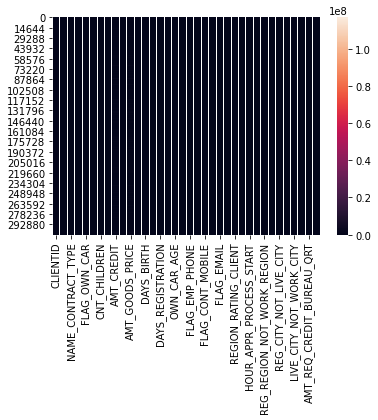

In [62]:
sns.heatmap(CCLoan_graph)

In [63]:
=CCLoan_graph.corr()

,CLIENTID,LATE_PAYMENT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CLIENTID,1.000000,-0.002108,0.001654,-0.000728,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000407,...,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,-0.000864,0.000809,0.003665
LATE_PAYMENT,-0.002108,1.000000,-0.030896,0.054713,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012794,...,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.055217,-0.005833,0.005522
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008783,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241503,...,0.035897,0.018561,0.015774,0.007941,0.013586,0.004487,-0.004999,0.061829,-0.021448,-0.049179
CODE_GENDER,-0.000728,0.054713,-0.008783,1.000000,0.345841,-0.044380,0.047382,0.074730,0.021601,0.076989,...,0.007145,0.023692,0.103458,0.106080,0.048257,0.137581,0.133275,0.025287,-0.009683,-0.023949
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345841,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141590,...,0.014369,-0.000668,0.038937,0.046352,0.003123,0.076081,0.088061,-0.039085,-0.004081,-0.017089
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.044380,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005154,...,-0.102687,-0.036301,-0.032316,-0.018324,-0.061709,-0.061889,-0.035991,0.027021,0.012013,0.052367
CNT_CHILDREN,-0.001129,0.019187,0.029998,0.047382,0.102023,-0.002366,1.000000,0.012882,0.002145,0.021414,...,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.005867,-0.004913,-0.029618
AMT_INCOME_TOTAL,-0.001820,-0.003982,-0.003531,0.074730,0.083383,0.002934,0.012882,1.000000,0.156870,0.191639,...,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,-0.018586,0.007924,0.019922
AMT_CREDIT,-0.000343,-0.030369,-0.221648,0.021601,0.116225,-0.039270,0.002145,0.156870,1.000000,0.770080,...,0.052738,0.024010,0.051929,0.052609,-0.026886,-0.018856,0.000081,-0.073704,0.020379,-0.026404
AMT_ANNUITY,-0.000407,-0.012794,-0.241503,0.076989,0.141590,-0.005154,0.021414,0.191639,0.770080,1.000000,...,0.052224,0.041251,0.079311,0.074426,-0.006260,0.000864,0.010038,-0.063749,0.010682,-0.005801


In [ ]:
#Task 10
# save the state_summary separately.
#CCLoan.to_csv(r'D:\springboard\DataScienceGuidedCapstone\Unit7\DataCapstoneProject2\ccFraudDefault\Cleaned_app_data_ver4.csv')



In [ ]:
#
#should do a graph of client ID vs the amount AMT_GOOD_PRICE / AMT_CREDIT

In [ ]:
#
#should do a graph of client ID vs the amount AMT_CREDIT / AMT_INCOME_TOTAL

In [ ]:
#Task x.6.5
#total people with cars and then information if they are late or not late on payment
car_owners = CCLoan[CCLoan['FLAG_OWN_CAR']== 'Y']
car_owner_T = car_owners[car_owners['LATE_PAYMENT']== 1]
car_owner_NT = car_owners[car_owners['LATE_PAYMENT']== 0]
print('Total Count:    '+ str(car_owners['LATE_PAYMENT'].count()))  #.sum() properway
print('LatePayment:    '+ str(car_owner_T['LATE_PAYMENT'].count()))
print('No LatePayment: '+ str(car_owner_NT['LATE_PAYMENT'].count()))

In [ ]:
#Task 6
#Find the % that is late vs not late
#8.1 % of total client is late
VS = (Late['CLIENTID'].count() / CCLoan['CLIENTID'].count())*100

print(VS)


In [ ]:
#Task 7
#get a list of clients who have a late installment
Late = CCLoan.loc[CCLoan['LATE_PAYMENT']. isin([1])]

In [ ]:
#Task 8
#count number of Target are late ---24825 is the output
Late.count()

In [ ]:
#Task 9
#try to find relationship where 
Late.head(25)


In [ ]:
#Task 10
Late[['CLIENTID','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].head(25)

In [ ]:
#Task 11
Late.describe()

In [ ]:
#Task 21
#put non late payment into another DF so I can graph the latepayment vs income
NonLate = CCLoan.loc[CCLoan['LATE_PAYMENT']. isin([0])]

In [ ]:
CCLoan[['CLIENTID','LATE_PAYMENT','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','FLAG_OWN_CAR']].head(25)

#Task 22
#graph amt_credit vs amt_annuity

y = NonLate['AMT_CREDIT']
y2 = NonLate['AMT_ANNUITY']

x = NonLate ['CLIENT']
fig = plt.figure()
ax = plt.subplot()
ax.plot(x, y, label='Credit Amount')
ax.plot(x, y2, label='Loan Payment')
plt.title('Legend inside')
ax.legend()


In [ ]:
#GRAPH target vs points FLAG_OWN_CAR, FLAG_OWN_REALTY




In [ ]:
#Task 1000
#testsplit  dataset
from sklearn.model_selection import train_test_split

train_test_split(x,y,test_size = .2)